In [56]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

Обработка по первому варианту, для замены варианта нужно прочесть другой файл

In [18]:
data1 = pd.read_excel("data/Вариант 1.xlsx", skiprows = 2, skipfooter = 1)
data1

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,117,11,М,341,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
1,2,148,12А,М,338,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
2,3,152,13,Ж,104,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9,22,24
3,4,152,13,М,104,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9,22,24
4,5,132,11,М,337,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10,24,24
...,...,...,...,...,...,...,...,...,...,...,...
3043,3044,146,11,Ж,338,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3044,3045,147,11,Ж,340,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3045,3046,147,11,Ж,338,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3046,3047,147,11,Ж,337,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24


#### 2. Сделайте описательную статистику по набранному баллу
#### 3. Найдите процент учащихся, выполнивших работу ниже среднего
#### 4. Найти процент учащихся не сдавших экзамен
#### 5.Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен
#### 6. Постройте ядерную оценку плотности распределению баллов за экзамен
#### 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».
#### 8. Какое процентное соотношение юношей и девушек писало данный экзамен?
#### 9. Сколько школ принимало участие в экзамене?

In [20]:
#2 
data1["Балл"].describe()

count    3048.000000
mean       72.769029
std        13.664908
min        20.000000
25%        64.000000
50%        72.000000
75%        82.000000
max       100.000000
Name: Балл, dtype: float64

In [27]:
#3
lowAvg = data1[data1["Балл"] < data1["Балл"].mean()].shape[0] / 3048 * 100
lowAvg

51.27952755905512

In [30]:
#4
fail = data1[data1["Балл"] < data1["Минимальный балл"].min()].shape[0] / 3048  * 100
fail

0.13123359580052493

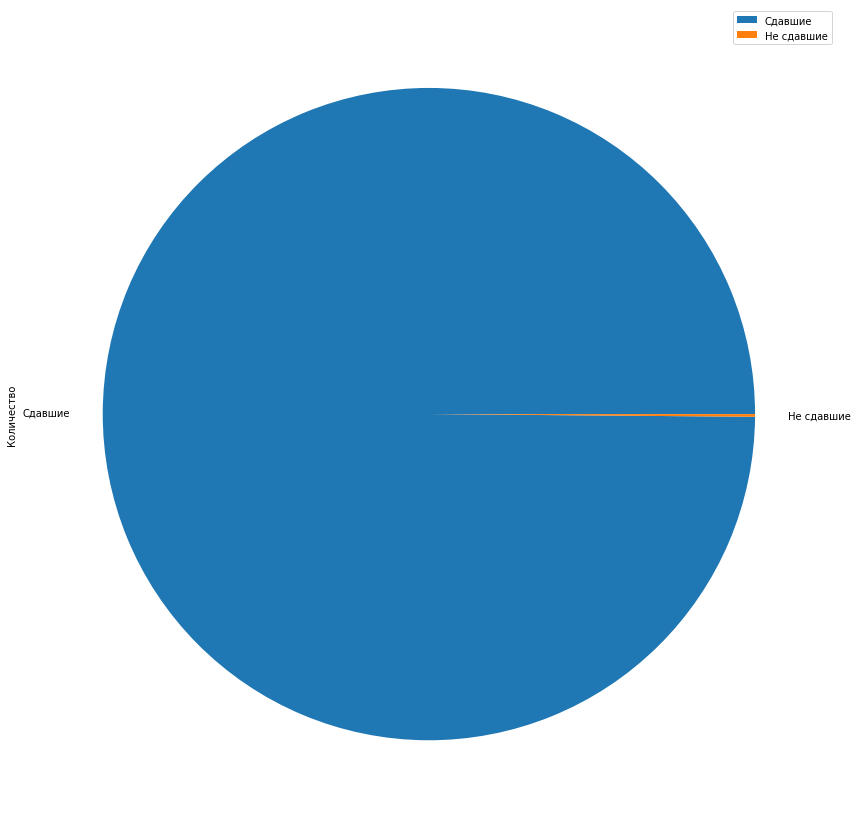

In [37]:
#5
ddt = [data1[data1["Балл"] > data1["Минимальный балл"].min()].shape[0], data1[data1["Балл"] < data1["Минимальный балл"].min()].shape[0]]
newdf = pd.DataFrame({"Количество": [data1[data1["Балл"] > data1["Минимальный балл"].min()].shape[0], data1[data1["Балл"] < data1["Минимальный балл"].min()].shape[0]]}, index = ["Cдавшие", "Не сдавшие"])

plot = newdf.plot.pie(y = "Количество", figsize=(15, 15))

C:\Users\alexv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


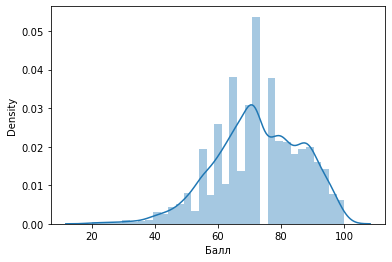

In [57]:
#6
sb.distplot(data1["Балл"])
plt.show()

In [50]:
#7
Amark = data1[data1["Балл"] >= 85].shape[0] / 3048  * 100
Bmark = data1[data1["Балл"] < 85]
Bmark = Bmark[Bmark["Балл"] >= 70].shape[0] / 3048  * 100
Cmark = data1[data1["Балл"] < 70]
Cmark = Cmark[Cmark["Балл"] >= 51].shape[0] / 3048  * 100
print(Amark," : ",Bmark," : ",Cmark)

24.639107611548557  :  36.25328083989501  :  33.46456692913386


In [42]:
#8
m = data1[data1["Пол"] == "М"].shape[0] / 3048 * 100
f = data1[data1["Пол"] == "Ж"].shape[0] / 3048 * 100
print(m," : ",f)

42.02755905511811  :  57.97244094488189


In [41]:
#9
data1["№ школы"].nunique()

24